In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("smsspamcollection.tsv", sep='\t')

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
len(df)

5572

In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

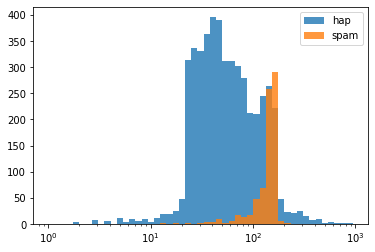

In [ ]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('hap','spam'))
plt.show()

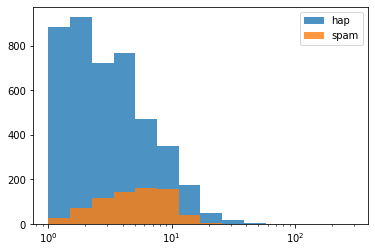

In [ ]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('hap','spam'))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X feature data
X = df[['length', 'punct']]

#y is our label
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 42)

In [ ]:
X_train.shape

(3900, 2)

In [ ]:
X_test.shape

(1672, 2)

In [ ]:
y_train.shape

(3900,)

In [ ]:
y_test.shape

(1672,)

In [ ]:
#y_test

In [ ]:
#X_test

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(solver='lbfgs')

In [ ]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics

In [ ]:
predictions = lr_model.predict(X_test)

In [ ]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
#y_test

In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [ ]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham','spam'], columns=['ham', 'spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [ ]:
metrics.accuracy_score(y_test, predictions)

0.8427033492822966

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))

[[1438   10]
 [ 224    0]]


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [ ]:
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')

svc_model.fit(X_train, y_train)

predictions = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))

[[1373   75]
 [ 121  103]]


Feature Extraction From Text

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("smsspamcollection.tsv", sep='\t')

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df['message']

In [ ]:
y=df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer()
# FIT vectorizer to the data (build a vocab, count the number of words...)
# count_vect.fit(X_train)
# X_train_counts = count_vect.transform(X_train)

# transform the original text message ------> VECTOR

X_train_counts = count_vect.fit_transform(X_train)

In [ ]:
X_train_counts    #(7082 unique words)

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [ ]:
X_train.shape

(3733,)

In [ ]:
X_train_counts.shape

(3733, 7082)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer()

In [ ]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
X_train_tfidf.shape

(3733, 7082)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
clf = LinearSVC()

In [ ]:
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
#X_test

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, predictions))

[[1586    7]
 [  12  234]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test, predictions)

0.989668297988037

In [ ]:
text_clf.predict(["Hi how are you doing today?"])

array(['ham'], dtype=object)

In [ ]:
text_clf.predict(["Congratulations! You have been selected as a winner. TEXT WOW to 66665 congratualtions frre entry to contest"])

array(['spam'], dtype=object)